# Analisis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Para obtener todo:
Primero correr la notebook de generar instancias, hay que crear la capreta "instancias" y dentro de ella las correspondientes para cada dataset, luego correr.
Proximo es correr toda la notebook de experimentos para guardar los resultados temporales.
## Los casos
Estos son:
- FB
    - Corrimos casos donde todo entra, nada entra, y random. Para mostrar que sin importar la instancia sigue recorriendo todo.
- BT
    - La complejidad con ambas podas, con poda por factibilidad y con poda por optimalidad
    - Luego analizamos las podas para las distintas instancias, de objetos debiles y luego fuertes
- PD
    - Aqui corremos para objetos debiles, fuertes y para instancias aleatorias con n y R grandes con poca granularidad, es decir variando ambas variables de a grandes saltos.


**Leemos las instancias**

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,R,metodo,tiempo
0,todo-entra-FB,1,14,FB,0.000666
1,todo-entra-FB,2,143,FB,0.000811
2,todo-entra-FB,3,122,FB,0.000923
3,todo-entra-FB,4,100,FB,0.001098
4,todo-entra-FB,5,261,FB,0.001924


# Experimento 1, Complejidad FB

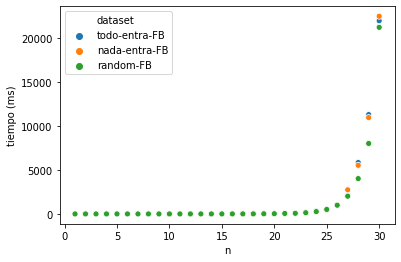

In [4]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
# hue: agrupa los puntos segun esta lista, puede ser por string o numeros
# en nuestro caso tenemos los puntos de distintos datasets
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

Índice de correlación de Pearson: 0.9963453573489787


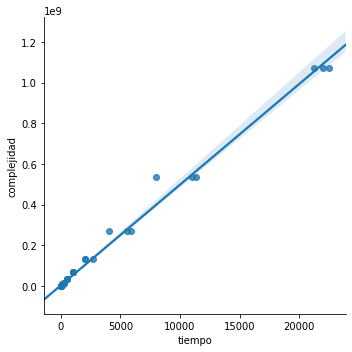

In [5]:
# Graficamos los tiempos de ejecución de las instancias contra complejidad esperada.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

# Experimento 2, Complejidad BT

## Mejor caso BT, ambas podas

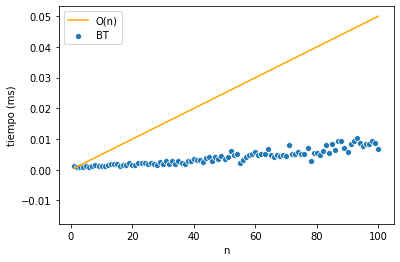

In [8]:

df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT-F")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9195642220578583


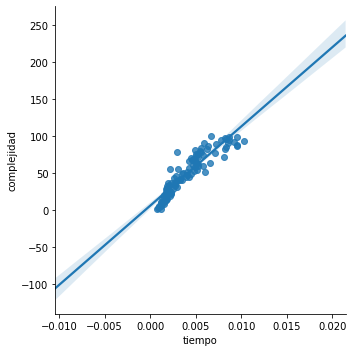

In [11]:
# Graficamos la correlacion entre los tiempos reales y la complejidad esperada
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-BT-F")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

## Peor caso BT, ambas podas

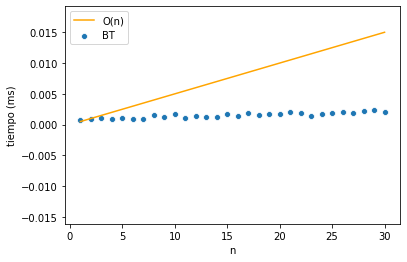

In [12]:

df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT-O")].copy();
df_BT_peor_caso["tiempo_esperado"] = df_BT_peor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

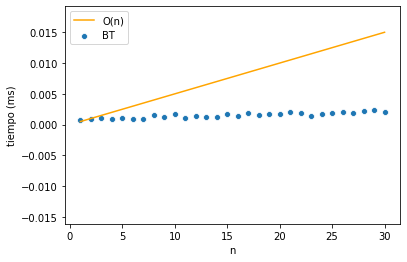

In [14]:
# Correlacion

df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-BT-O")].copy();
df_BT_peor_caso["tiempo_esperado"] = df_BT_peor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

## Analisis de las podas

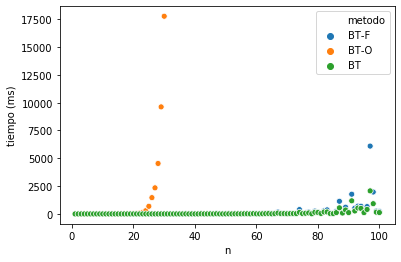

In [15]:
# Para objetos fuertes
df_BT_fuertes = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "ratio-resistenciaM1")].copy();
#df_BT_fuertes = df_BT_fuertes[df_BT_fuertes["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_fuertes, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

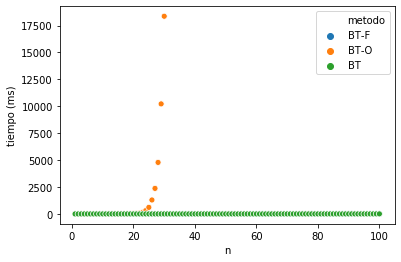

In [16]:
# Para objetos debiles
df_BT_debiles = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "ratio-resistenciam1")].copy();
fig = sns.scatterplot(data=df_BT_debiles, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

In [ ]:
#Veamos un poquito mas de cerca
# Para objetos debiles
df_resultados2 = df_resultados[df_resultados["tiempo" < 400]]
df_BT_debiles = df_resultados2[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "ratio-resistenciam1")].copy();
fig = sns.scatterplot(data=df_BT_debiles, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");

## Complejidad de Programacion Dinamica

In [ ]:
#Variamos el n, y fijamos un R
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

In [ ]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='W', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");